In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Sklearn prebuilt models
from sklearn.svm import SVC

# Sklearn metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [28]:
train = pd.read_csv('../Reformatted EMG Data/training_set.csv')
val = pd.read_csv('../Reformatted EMG Data/validation_set.csv')
test = pd.read_csv('../Reformatted EMG Data/test_set.csv')

In [29]:
print('Train shape: ', train.shape)
print('Val shape: ', val.shape)
print('Test shape: ', test.shape)

Train shape:  (1866, 57)
Val shape:  (622, 57)
Test shape:  (622, 57)


In [30]:
# Combine training and validation sets:
# Append validation to the end of training set using pandas.DataFrame.append 
# Dimensions are (622,57) and (1866,57) respectively, result should be of shape (1866+622,57) = (2488,57) 
# Set ignore_index=True so indices from validation set do not carry over to new dataframe
df = train.append(val, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,Gesture
0,12.800,5.625,3.350,7.525,15.750,30.925,13.000,11.350,797.0,379.0,...,0.135896,-0.676306,-0.651367,-0.331830,-0.208513,-0.188145,-0.391191,-0.183349,-0.262518,3
1,11.775,12.050,4.450,4.050,9.925,28.075,9.450,10.150,781.0,797.0,...,0.145100,-0.872881,-0.404738,-0.312142,-0.141769,-0.253684,-0.285637,0.037007,-0.185160,2
2,16.050,8.225,4.025,12.150,12.550,32.525,12.975,19.700,1037.0,565.0,...,0.009826,-0.552480,-0.417388,-0.145595,-0.009078,-0.447030,-0.370000,-0.309961,-0.249044,3
3,14.350,3.225,2.400,2.725,20.425,20.975,2.150,6.450,930.0,212.0,...,-0.372802,-0.348524,-0.133006,-0.095131,-0.226875,-0.348008,0.012600,-0.288841,-0.523217,1
4,12.375,2.525,1.600,2.500,14.825,11.700,1.625,4.000,783.0,149.0,...,-0.209545,-0.184494,-0.285429,-0.240479,-0.186715,-0.061272,-0.243753,-0.110633,-0.239182,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,14.000,12.350,4.250,3.875,12.525,18.850,2.850,7.625,1004.0,768.0,...,-0.381901,-0.187739,-0.190132,-0.035732,-0.314430,-0.190161,0.003855,-0.218739,-0.040739,2
2484,4.800,2.625,2.775,3.025,17.150,19.625,4.925,10.375,316.0,137.0,...,-0.351091,-0.272144,-0.117917,-0.240737,-0.339937,-0.323283,-0.208709,-0.295625,-0.514628,3
2485,18.750,14.850,4.700,5.100,17.150,26.475,10.825,13.000,1252.0,879.0,...,0.045476,-0.149866,-0.262809,-0.146483,-0.188831,-0.752618,-0.663131,-0.386512,-0.311171,2
2486,12.800,3.025,3.475,3.625,25.675,25.875,2.600,7.350,807.0,192.0,...,-0.525611,-0.422638,-0.173903,-0.420056,-0.446556,-0.502039,-0.409440,-0.424476,-0.437964,1


In [31]:
# Create independent and dependent variables for train and test sets
X_train = df.iloc[:,:-1].values
y_train = df.iloc[:,-1].values
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

# Show resulting dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2488, 56)
(2488,)
(622, 56)
(622,)


### Non Cross Validation

In [32]:
# Build, fit and score SVC
svc = SVC()
svc.fit(X_train, y_train)
train_score = svc.score(X_train, y_train)

# Make predictions on the test set
test_pred = svc.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print('Train accuracy: ', round(train_score, 4))
print('Test score: ', round(test_accuracy, 4))

Train accuracy:  0.9936
Test score:  0.9952


### Cross Validation

In [33]:
# Build, fit and score SVC using k-fold CV
svc = SVC()
svc.fit(X_train, y_train)
kfold = KFold(n_splits=10,shuffle=True)
cv = cross_val_score(svc, X_train, y_train, cv=kfold, scoring='accuracy')

test_pred = svc.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print('Cross val scores: ', cv)
print('Average CV Score: ', round(np.average(cv), 4))
print('Test score: ', round(test_accuracy, 4))

Cross val scores:  [0.99598394 0.99598394 0.99598394 0.99196787 0.99196787 0.99196787
 0.99598394 0.98795181 0.99193548 0.99193548]
Average CV Score:  0.9932
Test score:  0.9952


In [43]:
for i in range(len(cv)):
    print('CV Fold', i+1, 'score: ', round(np.average(cv[i]), 5))
print('\nAverage CV Score: ', round(np.average(cv), 4))

CV Fold 1 score:  0.99598
CV Fold 2 score:  0.99598
CV Fold 3 score:  0.99598
CV Fold 4 score:  0.99197
CV Fold 5 score:  0.99197
CV Fold 6 score:  0.99197
CV Fold 7 score:  0.99598
CV Fold 8 score:  0.98795
CV Fold 9 score:  0.99194
CV Fold 10 score:  0.99194

Average CV Score:  0.9932


### Hyperparameter tuning: GridSearchCV

In [8]:
param_grid = [{'C': [1, 10, 100, 1000],
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'degree': [1, 3, 5, 7],
               'gamma': ['scale', 'auto']}]

gs_cv = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'degree': [1, 3, 5, 7],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='accuracy')

In [9]:
print("Best parameters set found on validation set:")
print()
print(gs_cv.best_params_)
print()
print("Best score on validation set: %0.4f" % gs_cv.best_score_)
print()
print("Grid scores on validation set:")
print()
means = gs_cv.cv_results_['mean_test_score']
stds = gs_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs_cv.cv_results_['params']):
    print("%0.4f (+/-%0.04f) for %r"
          % (mean, std * 2, params))

Best parameters set found on validation set:

{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

Best score on validation set: 0.9952

Grid scores on validation set:

0.9948 (+/-0.0037) for {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.9932 (+/-0.0088) for {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.9932 (+/-0.0095) for {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.8316 (+/-0.0426) for {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.9948 (+/-0.0037) for {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.9944 (+/-0.0074) for {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.2524 (+/-0.0024) for {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.2524 (+/-0.0024) for {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.9948 (+/-0.0037) for {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
0.9879 (+/-0.0119) for {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.9932 (

In [10]:
test_pred = gs_cv.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print('Test Accuracy: ', round(test_accuracy, 4))

Test Accuracy:  0.9936


In [11]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       153
           2       0.98      0.99      0.99       169
           3       0.99      0.98      0.99       153

    accuracy                           0.99       622
   macro avg       0.99      0.99      0.99       622
weighted avg       0.99      0.99      0.99       622



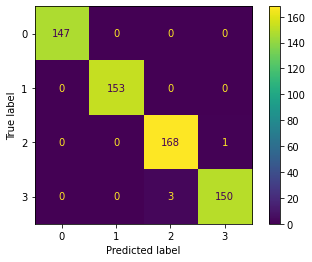

In [12]:
plot_confusion_matrix(gs_cv, X_test, y_test)

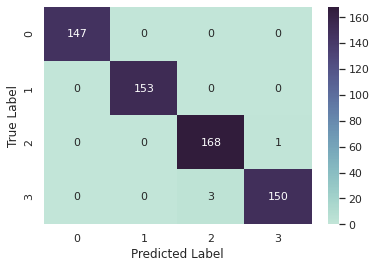

In [13]:
cm = confusion_matrix(y_test, test_pred)
sns.set(font_scale=1) # for label size
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), annot=True, annot_kws={"size": 11}, fmt='.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()